# BSC Challenge: The Last Circuit Cut

# Phase I : one circuit cut

We will perform factorization of (the tensor graph of) the following quantum circuit

![image](composer.png)

In [1]:
#First we import libraries, modules and constants
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, Aer, transpile, ClassicalRegister, assemble, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
from numpy import pi
from numpy import sqrt

We start by initializing the full circuit and its cuts and adding the corresponding registers

In [2]:
# Initialize first circuit and its cuts
qcircuit_1=QuantumCircuit()
qcircuit_1_cut_1=QuantumCircuit()
qcircuit_1_cut_2=QuantumCircuit()

In [3]:
qr=QuantumRegister(5, 'q')
qr_cut_1=QuantumRegister(3, 'q_1')
qr_cut_2=QuantumRegister(3, 'q_2')

In [4]:
qcircuit_1.add_register(qr)
qcircuit_1_cut_1.add_register(qr_cut_1);
qcircuit_1_cut_2.add_register(qr_cut_2);

### Full circuit 

In [5]:
for i in range(5):
    qcircuit_1.h(qr[i])

In [6]:
qcircuit_1.cx(qr[0], qr[1])
qcircuit_1.rx((pi/2), qr[3])
qcircuit_1.cx(qr[0], qr[2]);
qcircuit_1.rx((pi/2), qr[1]);
qcircuit_1.rx((pi/2), qr[2]);
qcircuit_1.rx((pi/2), qr[0]);
qcircuit_1.cx(qr[2], qr[3]);
qcircuit_1.cx(qr[4], qr[2]);
qcircuit_1.rx((pi/2), qr[4]);
qcircuit_1.rx((pi/2), qr[3]);

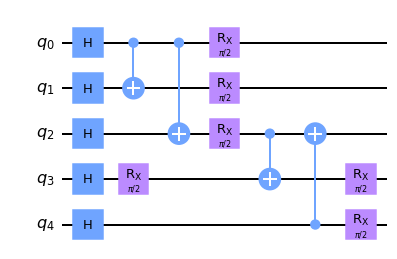

In [7]:
qcircuit_1.draw('mpl')

### Circuit cut: initial circuit

In [13]:
for i in range(3):
    qcircuit_1_cut_1.h(qr_cut_1[i])

In [14]:
qcircuit_1_cut_1.cx(qr_cut_1[0], qr_cut_1[1]);
qcircuit_1_cut_1.cx(qr_cut_1[0], qr_cut_1[2]);
qcircuit_1_cut_1.rx((pi/2), qr_cut_1[1]);
qcircuit_1_cut_1.rx((pi/2), qr_cut_1[2]);
qcircuit_1_cut_1.rx((pi/2), qr_cut_1[0]);

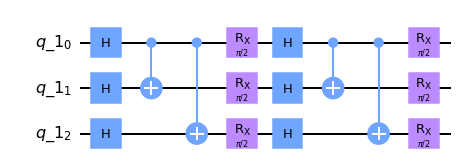

In [15]:
qcircuit_1_cut_1.draw('mpl')

### Circuit cut: end circuit

In [16]:
for i in range(3):
    qcircuit_1_cut_2.h(qr_cut_2[i])

In [17]:
qcircuit_1_cut_2.rx((pi/2), qr_cut_2[1]);
qcircuit_1_cut_2.cx(qr_cut_2[0], qr_cut_2[1]);
qcircuit_1_cut_2.cx(qr_cut_2[2], qr_cut_2[0]);
qcircuit_1_cut_2.rx((pi/2), qr_cut_2[2]);
qcircuit_1_cut_2.rx((pi/2), qr_cut_2[1]);

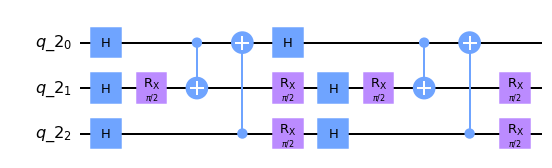

In [18]:
qcircuit_1_cut_2.draw('mpl')

## Now we define the eight operators that we will aply for the initial cut

### Pauli Matrices

In [19]:
Matrix_I = np.matrix([[1,0],[0,1]])
Matrix_X = np.matrix([[0,1],[1,0]])
Matrix_Y = np.matrix([[0,-1j],[1j,0]])
Matrix_Z = np.matrix([[1,0],[0,-1]])

### Operators whose expected value will take part in the computation  

In [20]:
O_1 = np.kron(np.kron(Matrix_I, Matrix_I), Matrix_I)
O_2 = O_1
O_2

matrix([[1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1]])

In [21]:
O_3 = np.kron(np.kron(Matrix_I, Matrix_I), Matrix_X)
O_4 = O_3
O_4

matrix([[0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0]])

In [22]:
O_5 = np.kron(np.kron(Matrix_I, Matrix_I), Matrix_Y)
O_6 = O_5
O_6

matrix([[0.+0.j, 0.-1.j, 0.+0.j, 0.-0.j, 0.+0.j, 0.-0.j, 0.+0.j, 0.-0.j],
        [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.-0.j, 0.+0.j, 0.-1.j, 0.+0.j, 0.-0.j, 0.+0.j, 0.-0.j],
        [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.-0.j, 0.+0.j, 0.-0.j, 0.+0.j, 0.-1.j, 0.+0.j, 0.-0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.-0.j, 0.+0.j, 0.-0.j, 0.+0.j, 0.-0.j, 0.+0.j, 0.-1.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j]])

In [23]:
O_7 = np.kron(np.kron(Matrix_I, Matrix_I), Matrix_Z)
O_8 = O_7
O_8

matrix([[ 1,  0,  0,  0,  0,  0,  0,  0],
        [ 0, -1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0,  0,  0,  0],
        [ 0,  0,  0, -1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1,  0],
        [ 0,  0,  0,  0,  0,  0,  0, -1]])

### Initial subgraphs and their corresponding quantum circuits

In [24]:
qc1_cut_1 = qcircuit_1_cut_1.copy()

### Expectation values initial circuit (classical)

In [25]:
outputs_cut_1=[]
for Op in [O_1, O_2, O_3, O_4, O_5, O_6, O_7, O_8]:
    M = np.matmul(Operator(qc1_cut_1),Op)
    output = Statevector([0,0,0,0,0,0,0,1]).expectation_value(M)
    outputs_cut_1.append(output)
outputs_cut_1

[(0.2499999999999998-0.2499999999999999j),
 (0.2499999999999998-0.2499999999999999j),
 (0.2499999999999999-0.24999999999999992j),
 (0.2499999999999999-0.24999999999999992j),
 (-0.24999999999999992-0.2499999999999999j),
 (-0.24999999999999992-0.2499999999999999j),
 (-0.2499999999999998+0.2499999999999999j),
 (-0.2499999999999998+0.2499999999999999j)]

### Expectation values initial circuit (quantum)

In [27]:
backend = Aer.get_backend('statevector_simulator')

In [34]:
qc1_cut_in = qcircuit_1_cut_1.copy()

### Adding the gates

In [36]:
qc_1_1= qc1_cut_in.copy()
qc_1_2= qc1_cut_in.copy()
qc_1_3= qc1_cut_in.copy()
qc_1_3.rx((pi/2), qr_cut_1[2])
qc_1_4 = qc1_cut_in.copy()
qc_1_4.rx((pi/2), qr_cut_1[2])
qc_1_5= qc1_cut_in.copy()
qc_1_5.ry((pi/2), qr_cut_1[2])
qc_1_6= qc1_cut_in.copy()
qc_1_6.ry((pi/2), qr_cut_1[2])
qc_1_7= qc1_cut_in.copy()
qc_1_7.rz((pi/2), qr_cut_1[2])
qc_1_8= qc1_cut_in.copy()
qc_1_8.rz((pi/2), qr_cut_1[2])

In [37]:
counts_1_1 = backend.run(qc_1_1, shots=2**10).result().get_counts(qc_1_1)
counts_1_1

{'100': 0.25, '101': 0.25, '110': 0.25, '111': 0.25}

In [38]:
counts_1_2 = backend.run(qc_1_2, shots=2**10).result().get_counts(qc_1_2)
counts_1_2

{'100': 0.25, '101': 0.25, '110': 0.25, '111': 0.25}

In [39]:
counts_1_3 = backend.run(qc_1_3, shots=2**10).result().get_counts(qc_1_3)
counts_1_3

{'000': 0.125,
 '001': 0.125,
 '010': 0.125,
 '011': 0.125,
 '100': 0.125,
 '101': 0.125,
 '110': 0.125,
 '111': 0.125}

In [40]:
counts_1_4 = backend.run(qc_1_4, shots=2**10).result().get_counts(qc_1_4)
counts_1_4

{'000': 0.125,
 '001': 0.125,
 '010': 0.125,
 '011': 0.125,
 '100': 0.125,
 '101': 0.125,
 '110': 0.125,
 '111': 0.125}

In [41]:
counts_1_5 = backend.run(qc_1_5, shots=2**10).result().get_counts(qc_1_5)
counts_1_5

{'000': 0.125,
 '001': 0.125,
 '010': 0.125,
 '011': 0.125,
 '100': 0.125,
 '101': 0.125,
 '110': 0.125,
 '111': 0.125}

In [42]:
counts_1_6 = backend.run(qc_1_6, shots=2**10).result().get_counts(qc_1_6)
counts_1_6

{'000': 0.125,
 '001': 0.125,
 '010': 0.125,
 '011': 0.125,
 '100': 0.125,
 '101': 0.125,
 '110': 0.125,
 '111': 0.125}

In [43]:
counts_1_7 = backend.run(qc_1_7, shots=2**10).result().get_counts(qc_1_7)
counts_1_7

{'100': 0.25, '101': 0.25, '110': 0.25, '111': 0.25}

In [44]:
counts_1_8 = backend.run(qc_1_8, shots=2**10).result().get_counts(qc_1_8)
counts_1_8

{'100': 0.25, '101': 0.25, '110': 0.25, '111': 0.25}

### Second cut

In [45]:
v_1= np.array([1, 0])
v_2= np.array([0, 0])
v_3= np.array([0.5, 0.5])
v_4= np.array([0.5, -0.5])
v_5= np.array([0.5, 0.5j])
v_6= np.array([0.5, -0.5j])
v_7= np.array([1, 0])
v_8= np.array([0, 0])

### Densities

In [46]:
rho_1=np.kron(v_1, np.array([0,0,0,1]))
rho_2=np.kron(v_2, np.array([0,0,0,1]))
rho_3=np.kron(v_3, np.array([0,0,0,1]))
rho_4=np.kron(v_4, np.array([0,0,0,1]))
rho_5=np.kron(v_5, np.array([0,0,0,1]))
rho_6=np.kron(v_6, np.array([0,0,0,1]))
rho_7=np.kron(v_7, np.array([0,0,0,1]))
rho_8=np.kron(v_8, np.array([0,0,0,1]))

In [48]:
qc1_cut_2 = qcircuit_1_cut_2.copy()

In [49]:
outputs_cut_2=[]
for density in [rho_1, rho_2, rho_3, rho_4, rho_5, rho_6, rho_7, rho_8]:
    output = Statevector(density).expectation_value(qc1_cut_2)
    outputs_cut_2.append(output)
outputs_cut_2

[(4.762103912697979e-18-1.6258839764163448e-17j),
 0j,
 (-6.938893903907228e-18+4.163336342344337e-17j),
 (-3.469446951953614e-17+0j),
 (-4.163336342344337e-17+3.469446951953614e-17j),
 (6.938893903907228e-18+6.938893903907228e-18j),
 (4.762103912697979e-18-1.6258839764163448e-17j),
 0j]

In [50]:
np.asarray(outputs_cut_1)

array([ 0.25-0.25j,  0.25-0.25j,  0.25-0.25j,  0.25-0.25j, -0.25-0.25j,
       -0.25-0.25j, -0.25+0.25j, -0.25+0.25j])

In [51]:
exp_cut = np.asarray(outputs_cut_1)*np.asarray(outputs_cut_2)


In [52]:
expectations_cut=0.5*exp_cut[0]+0.5*exp_cut[1]+0.5*exp_cut[2]-0.5*exp_cut[3]+0.5*exp_cut[4]-0.5*exp_cut[5]+0.5*exp_cut[6]-0.5*exp_cut[7]

In [53]:
expectations_cut

(1.8214596497756468e-17+4.3368086899420154e-18j)

In [54]:
0.3125*2

0.625

In [55]:
full_circuit=qcircuit_1.copy()

In [56]:
result = backend.run(full_circuit, shots=2**10).result()
#statevector_1 = result_cut_1.get_statevector(qc1_cut_1)
counts = result.get_counts(full_circuit)
counts

{'00000': 0.03125,
 '00001': 0.03125,
 '00010': 0.03125,
 '00011': 0.03125,
 '00100': 0.03125,
 '00101': 0.03125,
 '00110': 0.03125,
 '00111': 0.03125,
 '01000': 0.03125,
 '01001': 0.03125,
 '01010': 0.03125,
 '01011': 0.03125,
 '01100': 0.03125,
 '01101': 0.03125,
 '01110': 0.03125,
 '01111': 0.03125,
 '10000': 0.03125,
 '10001': 0.03125,
 '10010': 0.03125,
 '10011': 0.03125,
 '10100': 0.03125,
 '10101': 0.03125,
 '10110': 0.03125,
 '10111': 0.03125,
 '11000': 0.03125,
 '11001': 0.03125,
 '11010': 0.03125,
 '11011': 0.03125,
 '11100': 0.03125,
 '11101': 0.03125,
 '11110': 0.03125,
 '11111': 0.03125}